# Modern Hopfield Networks on the CIFAR10 dataset
**2025 Spring CSCI1470 Deep Learning Final Project**

**Authors: [Haosheng Wang](https://github.com/Wonder947), Edrick Guerrero, [Alfonso Gordon Cabello de los Cobos](https://github.com/AlfonsoR-GordonCC)**

In this project we have created a Hopfiel Network that memorizes patterns on a grayscale version of the CIFAR10 dataset for it to be able to reconstruct the images from altered samples using TensorFlow.

The goals for this project are:
1. BASE GOAL: high accuracy with small part of the dataset
2. TARGET GOAL: analyze how accuracy is affected by the quality (i.e. correlation between
images) and quantity (number of images to store) of the stored images/features.
3. STRETCH GOAL: analyze how accuracy is affected by the quality (e.g. amount of noise,
completeness of features) of the images/features used for retrieval.

First we import the needed libraries for the project to work.

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib as mat
import matplotlib.pyplot as plt


Then we import the CIFAR10 dataset and isolate samples according to the goals of the project. Those samples must be in grayscale ffor the Network to memorize patterns correctly.

Taking a 1% of the CIFAR10 dataset. Total of 600 images used.

Images selected.
 Checking if they are in grayscale...
Cool, we can continue. Here you have one of the images


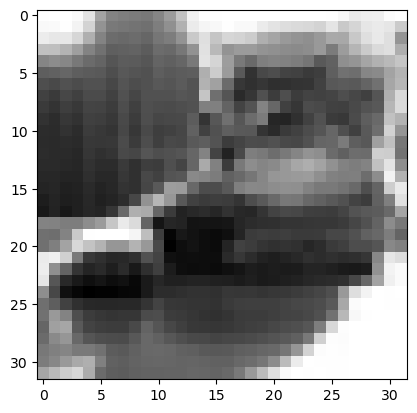

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

complete_imgs = np.concatenate((x_train, x_test), axis=0) #Create a Numpy Array with all the images

percentage = input("What percentage of the CIFAR10 dataset (60000 images) do you want to use?")
if percentage == '': #If the user has not decided a percentage, 10% is default
    percentage = 10
else:
    percentage = int(round(float(percentage)))

number_images_used = int(round(60000 * (percentage/100))) # Number of images that will be used

print(f'Taking a {percentage}% of the CIFAR10 dataset. Total of {number_images_used} images used.\n')

images_used = np.zeros(shape=(number_images_used, complete_imgs.shape[1], complete_imgs.shape[2], 1)) #Initialize a zero array with the same size of the complete

used_indices = set()
for i in range(number_images_used): #Lets use random images of the dataset
    n = np.random.randint(0, complete_imgs.shape[0])
    if n not in used_indices:
        images_used[i] = tf.image.rgb_to_grayscale(complete_imgs[n]) #Changes the images to grayscale
        used_indices.add(n)


print("Images selected.\n Checking if they are in grayscale...")
plt.imshow(images_used[0], cmap='gray')
print("Cool, we can continue. Here you have one of the images")

After getting the images and turned them into grayscale, is time to create the testing set by cropping the oringinal images.

Checking if they are cropped correctly...
Cool, we can continue. Here you have one of the images


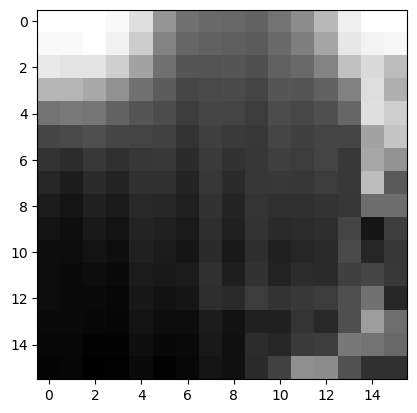

In [6]:
cropped_images = images_used[:, :16, :16, :] 

print("Checking if they are cropped correctly...")
plt.imshow(cropped_images[0], cmap='gray')
print("Cool, we can continue. Here you have one of the images")